# Overview


---
# Importing Libraries and Creating DataFrames

__importing libraries__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__updating the default values of DataFrame__

In [3]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 50)

__importing datasets in pandas dataframe__

In [4]:
# DataFrame for cities
df_cities = pd.read_csv("G:\\Coding\\Data Science\\Projects\\Python (Analytics)\\Marketing Team in Food and Beverage Industry\\C6 Input Files\\Dataset\\dim_cities.csv")
df_cities.rename(lambda x : x.lower(), axis='columns', inplace=True)
df_cities.head()

,city_id,city,tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2


In [5]:
# DataFrame for respondents
df_respondents = pd.read_csv("G:\\Coding\\Data Science\\Projects\\Python (Analytics)\\Marketing Team in Food and Beverage Industry\\C6 Input Files\\Dataset\\dim_repondents.csv")
df_respondents.rename(lambda x : x.lower(), axis='columns', inplace=True)
df_respondents.head()

,respondent_id,name,age,gender,city_id
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [6]:
# DataFrame for survey responses
df_survey_responses = pd.read_csv("G:\\Coding\\Data Science\\Projects\\Python (Analytics)\\Marketing Team in Food and Beverage Industry\\C6 Input Files\\Dataset\\fact_survey_responses.csv")
df_survey_responses.columns = [x.lower() for x in df_survey_responses.columns]
df_survey_responses.head()

,response_id,respondent_id,consume_frequency,consume_time,consume_reason,heard_before,brand_perception,general_perception,tried_before,taste_experience,reasons_preventing_trying,current_brands,reasons_for_choosing_brands,improvements_desired,ingredients_expected,health_concerns,interest_in_natural_or_organic,marketing_channels,packaging_preference,limited_edition_packaging,price_range,purchase_location,typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,Availability,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,Other,Sky 9,Other,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


---
# Exploratory Data Analysis (EDA)

In [7]:
# number of rows and columns in each data frame
print('(rows, columns) in df_cities : ', df_cities.shape)
print('(rows, columns) in df_respondents : ', df_respondents.shape)
print('(rows, columns) in df_survey_reponses : ', df_survey_responses.shape)

(rows, columns) in df_cities :  (10, 3)
(rows, columns) in df_respondents :  (10000, 5)
(rows, columns) in df_survey_reponses :  (10000, 23)


In [ ]:
# finding null entries in each columns of DataFrames
print(df_cities.isnull().any(), "\n")
print(df_respondents.isnull().any(), "\n")
print(df_survey_responses.isnull().any(), "\n")

In [ ]:
# datatypes of all the columns
print(df_cities.dtypes, "\n")
print(df_respondents.dtypes, "\n")
print(df_survey_responses.dtypes, "\n")

---
# Primary Data Analysis
1. Demographics Insights
2. Consumer Preference
3. Competition Analysis
4. Marketing Channels and Brand Awareness
5. Brand Penetration 
6. Purchase Behaviour
7. Product Development

---
## Demographics Insights
- Who prefers energy drink more? (male/female/non-binary?)
- Which age group prefers energy drinks more?
- Which type of marketing reaches the most Youth (15-30)?

__Who prefers energy drink more?__
> energy drink is most preferred by males, least by non-binary while female lies in between 

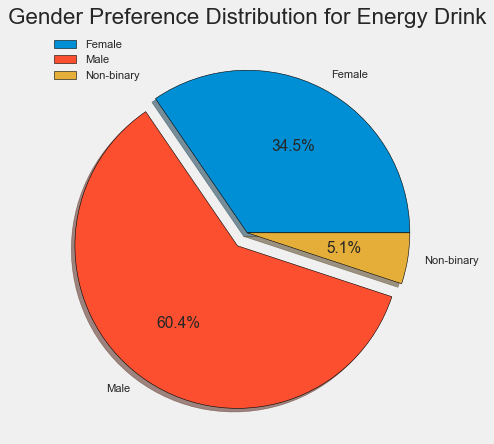

In [144]:
# collecting the required data
pie_data = np.array(df_respondents.groupby('gender')['respondent_id'].count().sort_index())
pie_label = df_respondents['gender'].sort_values().unique()

# making the pie chart
plt.pie(pie_data, labels=pie_label, 
        autopct='%1.1f%%', explode=[0, 0.1, 0], shadow=True,
        wedgeprops={'edgecolor' : 'black'})

# formatting data
plt.style.use('fivethirtyeight')
plt.legend(loc='upper left')
plt.tight_layout() 
plt.title('Gender Preference Distribution for Energy Drink')
plt.show()

__Which age group prefers energy drinks more?__
> energy drink is most preferred by age group of 19-30 and 30-45 

List of Age Group is :  ['15-18' '19-30' '31-45' '46-65' '65+']


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


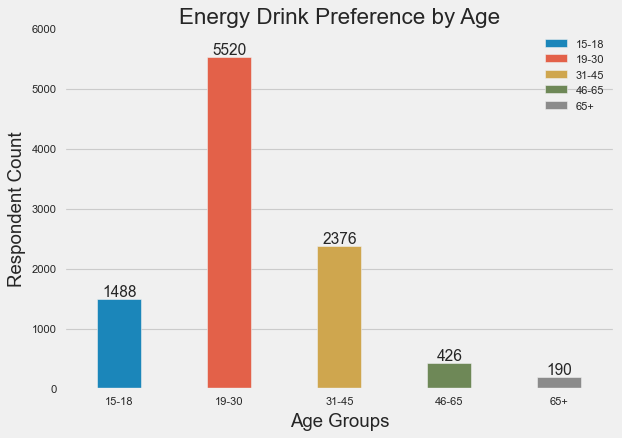

In [106]:
# list of age groups 
print('List of Age Group is : ', df_respondents['age'].unique()) 

# using seaborn for plotting
labels = np.array(df_respondents['age'].unique())
ax = sns.countplot(x='age', data=df_respondents, label=labels, width=0.4)

# making data labels
for i in ax.containers:
    ax.bar_label(i,)

# formatting plot
plt.style.use('fivethirtyeight')
plt.legend()
plt.tight_layout()
plt.title('Energy Drink Preference by Age')
plt.xlabel('Age Groups')
plt.ylabel('Respondent Count')
plt.show()

__Which type of marketing reaches the most Youth (15-30)?__
> Online ads and TV commercials provides high reach out among age group 15-30 years

In [8]:
# merging the Data Frame 
merged_respondent_responses = pd.merge(df_respondents, df_survey_responses, on=['respondent_id'], how='inner')

# creating dataframe from filter
age_filter = (merged_respondent_responses['age'] == '15-18') | (merged_respondent_responses['age'] == '19-30')
effective_youth_marketing = merged_respondent_responses.loc[age_filter, ['respondent_id', 'age', 'marketing_channels']] 

merged_respondent_responses.head()

,respondent_id,name,age,gender,city_id,response_id,consume_frequency,consume_time,consume_reason,heard_before,brand_perception,general_perception,tried_before,taste_experience,reasons_preventing_trying,current_brands,reasons_for_choosing_brands,improvements_desired,ingredients_expected,health_concerns,interest_in_natural_or_organic,marketing_channels,packaging_preference,limited_edition_packaging,price_range,purchase_location,typical_consumption_situations
0,120031,Aniruddh Issac,15-18,Female,CT117,103001,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,120032,Trisha Rout,19-30,Male,CT118,103002,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,120033,Yuvraj Virk,15-18,Male,CT116,103003,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,Availability,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,120034,Pranay Chand,31-45,Female,CT113,103004,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,120035,Mohanlal Joshi,19-30,Female,CT120,103005,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,Other,Sky 9,Other,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Youth Reach by Marketing Channel'),
 Text(0.5, 0, 'Marketing Channel'),
 Text(0, 0.5, 'Reach')]

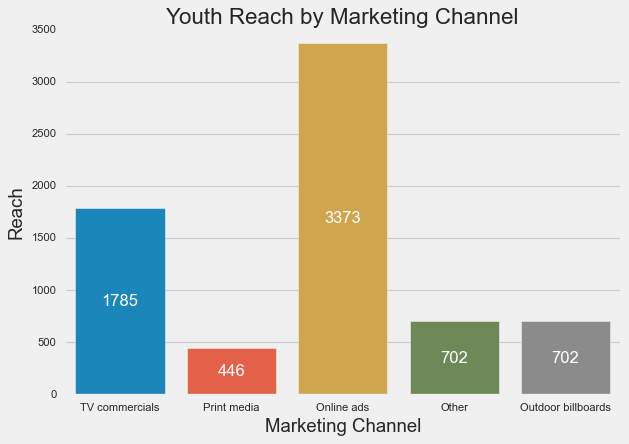

In [324]:
# plotting graph 
ax = sns.countplot(x='marketing_channels', data=effective_youth_marketing)

# data labelling
for i in ax.containers:
    ax.bar_label(i, label_type='center', fontsize=15,color='white')

# formatting graph
plt.style.use('fivethirtyeight')
ax.set(title='Youth Reach by Marketing Channel' ,xlabel='Marketing Channel', ylabel='Reach')

---
## Consumer Preferences
- What are the preferred ingredients of energy drinks among respondents?
- What packaging preferences do respondents have for energy drinks?

__What are the preferred ingredients of energy drinks among respondents?__
> Caffeine is the most predominant ingredient of energy drink among respondents 

In [ ]:
# list of all the ingredients in energy drink
print('List of all the ingredients in the list : ', df_survey_responses['ingredients_expected'].unique())

# filtering the data for usage
ingredients_used = np.array(df_survey_responses['ingredients_expected'].sort_values().unique()) 
ingredients_used_response = df_survey_responses.groupby(['ingredients_expected'])['respondent_id'].agg({'count'}).sort_index()
print(ingredients_used)
ingredients_used_response

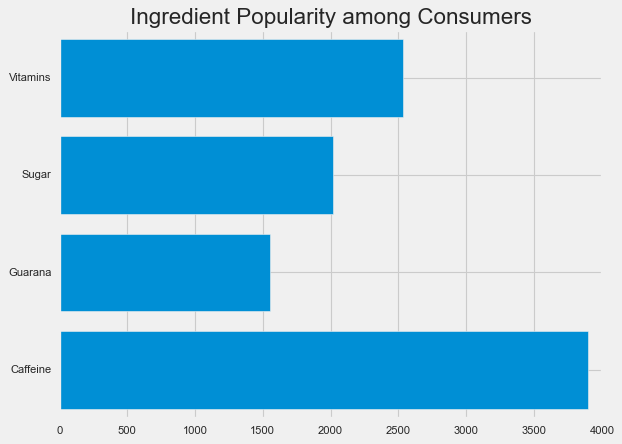

In [201]:
# we need to reshape the y_axis column from (4, 1) to (1, 4) for correct input
x_axis = np.arange(len(ingredients_used))
y_axis = np.array(ingredients_used_response).reshape(-1)

# horizontal bar plot
aa = plt.barh(x_axis, y_axis)
plt.yticks(ticks=x_axis, labels=ingredients_used)

# formatting
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.title('Ingredient Popularity among Consumers')
plt.show()

__What packaging preferences do respondents have for energy drinks?__
> respondents like to have a compact portable and innovative bottle design for energy drink packaging

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


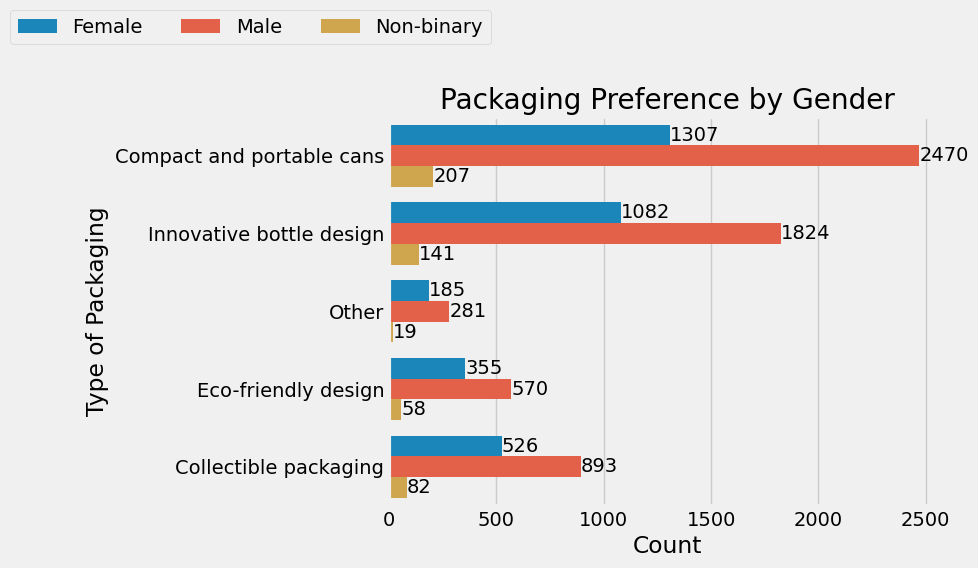

In [14]:
# preparing a bar plot
ax = sns.countplot(data=merged_respondent_responses, y='packaging_preference', hue='gender')

# making data label
for i in range(len(df_respondents['gender'].unique())):
    ax.bar_label(ax.containers[i])

# formatting plot
plt.style.use('fivethirtyeight')
plt.legend(bbox_to_anchor=(0.2, 1.3), ncols=3)
# plt.tight_layout()
ax.set_title('Packaging Preference by Gender', loc='center')
ax.set(xlabel='Count', ylabel='Type of Packaging')
plt.show()

---
## Competition Analysis
- Who are the current market leaders?
- What are the primary reasons consumers prefer those brands over ours?

__Who are the current market leaders?__
> current market leaders are Cola-Coka (25.4%), Bepsi(21.1%) and Gangster(18.5%) while CodeX stands at 9.8% among respondents 

List of existing companies :  ['Blue Bull' 'Bepsi' 'Sky 9' 'Cola-Coka' 'Gangster' 'CodeX' 'Others']


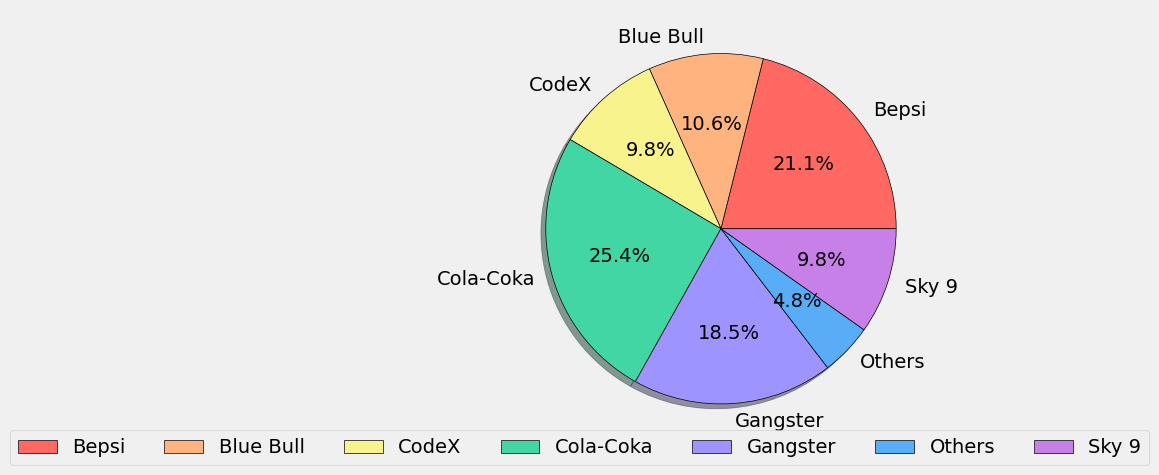

In [23]:
# list of all the companies 
print('List of existing companies : ', df_survey_responses['current_brands'].unique())

# filtering the dataset for respective 
pie_data = df_survey_responses.groupby(['current_brands'])['respondent_id'].count()
pie_data = np.array(pie_data.sort_index()).reshape(-1)
pie_label = np.array(df_survey_responses['current_brands'].sort_values().unique())
pie_color = ['#ff6961', '#ffb480', '#f8f38d', '#42d6a4', '#9d94ff', '#59adf6', '#c780e8']

# making pie chart
plt.pie(pie_data, labels=pie_label, colors=pie_color,
        autopct='%1.1f%%', shadow=True,
        wedgeprops={'edgecolor' : 'black'})

# plot formatting
plt.set_cmap('tab10')
plt.tight_layout()
plt.legend(loc='center right', ncols = 7, bbox_to_anchor = (1.5, 0)) # (x, y)
plt.show()

__What are the primary reasons consumers prefer those brands over ours?__
> Cola-Coka, Bepsi and Gangster are market leaders because of Brand Reputation, Availability and Taste/Flavour Preference

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


List of reason for other brand success :  ['Availability' 'Other' 'Brand reputation' 'Effectiveness'
 'Taste/flavor preference']


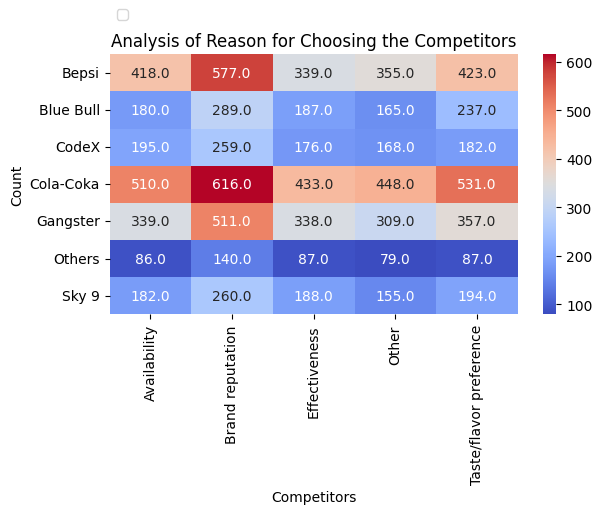

In [10]:
# list of reasons 
print('List of reason for other brand success : ', df_survey_responses['reasons_for_choosing_brands'].unique())

# extracting required 
responses = df_survey_responses[['current_brands', 'respondent_id', 'reasons_for_choosing_brands']]
responses_pivot = responses.pivot_table(values='respondent_id', 
                                        index='current_brands', 
                                        columns='reasons_for_choosing_brands', 
                                        aggfunc=pd.Series.nunique)

# stacked bar plot for reasons
ax = sns.heatmap(responses_pivot, cmap='coolwarm', annot=True, fmt='.1f')

# formatting plot
plt.tight_layout()
plt.title('Analysis of Reason for Choosing the Competitors')
plt.xlabel('Competitors')
plt.ylabel('Count')
plt.legend(loc='upper left', 
           bbox_to_anchor=(0, 1.2), 
           ncols=len(df_survey_responses['reasons_for_choosing_brands'].unique()))
plt.show()

---
## Marketing Channels and Brand Awareness:
- Which marketing channel can be used to reach more customers?
- How effective are different marketing strategies and channels in reaching our customers?

__Which marketing channel can be used to reach more customers?__
> Online Ads and TV commercials that can be the potention high leverage marketing channels

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


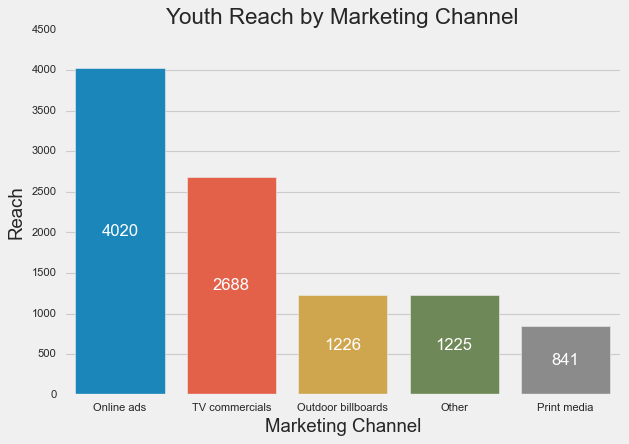

In [328]:
# plotting graph 
ax = sns.countplot(data=df_survey_responses, 
                   x='marketing_channels',
                   order=df_survey_responses['marketing_channels'].value_counts().index)

# data labelling
for i in ax.containers:
    ax.bar_label(i, label_type='center', fontsize=15,color='white')

# formatting graph
plt.style.use('fivethirtyeight')
ax.set(title='Youth Reach by Marketing Channel',
       xlabel='Marketing Channel', 
       ylabel='Reach')
plt.show()

__How effective are different marketing strategies and channels in reaching our customers?__
> Online Ads and TV Commercials are the most influencial merketing channels for our target customers

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


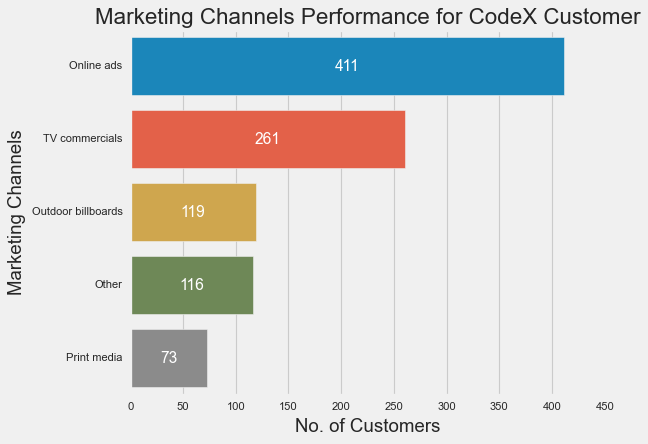

In [340]:
# codeX customer filter
filter_codeX = (df_survey_responses['current_brands'] == 'CodeX')
codeX_customers = df_survey_responses.loc[filter_codeX, ['respondent_id', 'marketing_channels']] 

# making a plot
ax = sns.countplot(data=codeX_customers, 
                   y='marketing_channels',
                   order=codeX_customers['marketing_channels'].value_counts().index)
ax.bar_label(ax.containers[0], label_type='center', color='white')

# formatting plot
plt.tight_layout()
ax.set(title='Marketing Channels Performance for CodeX Customer',
       xlabel='No. of Customers',
       ylabel='Marketing Channels')
plt.show()

---
## Brand Penetration
- What do people think about our brand? (overall rating)
- Which cities do we need to focus more on?

__What do people think about our brand? (overall rating)__
> - Our Overall Rating is 3.27 out of 5
> - Most of our customers that voted have following persona 
>     * age group between 19 - 30
>     * male
>     * consumption for sports/exercise or studying/late working

In [346]:
# extracting the relevant datasets
brand_visibility = merged_respondent_responses.loc[filter_codeX, ['respondent_id', 'gender', 'age', 'taste_experience', 'marketing_channels', 'purchase_location', 'typical_consumption_situations']]
brand_visibility.head()

,respondent_id,gender,age,taste_experience,marketing_channels,purchase_location,typical_consumption_situations
10,120041,Female,19-30,5,Online ads,Supermarkets,Sports/exercise
16,120047,Male,19-30,4,Print media,Supermarkets,Studying/working late
32,120063,Male,19-30,3,TV commercials,Supermarkets,Sports/exercise
34,120065,Male,19-30,2,Online ads,Supermarkets,Social outings/parties
35,120066,Female,19-30,2,Other,Supermarkets,Sports/exercise


In [ ]:
# # making multiple subplots stacked vertically
# fig, ax = plt.subplots(nrows=3, sharey=True)
# fig.suptitle('Brand Exposure')

# # plotting differrent curves
# ax1 = sns.countplot(data=brand_visibility, y='taste_experience', hue='age', ax=ax[0]) 
# ax2 = sns.countplot(data=brand_visibility, y='taste_experience', hue='gender', ax=ax[1]) 
# ax3 = sns.countplot(data=brand_visibility, y='taste_experience', hue='typical_consumption_situations', ax=ax[2]) 

# plt.tight_layout()

Average Ratings of CodeX is :  3.27


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

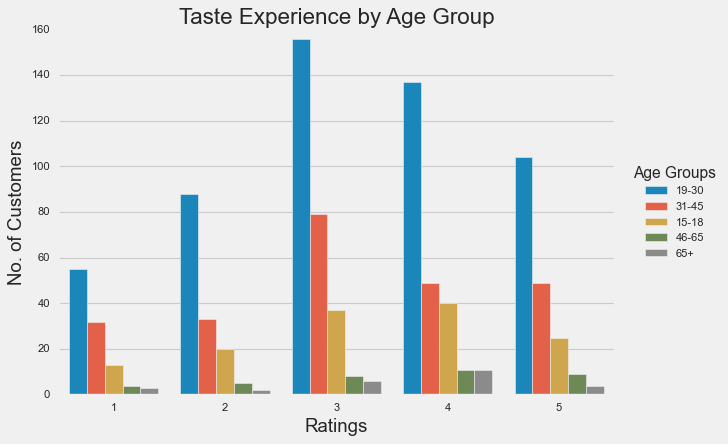

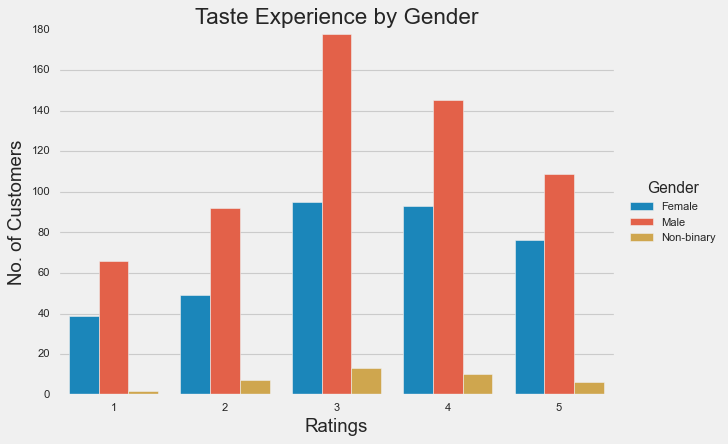

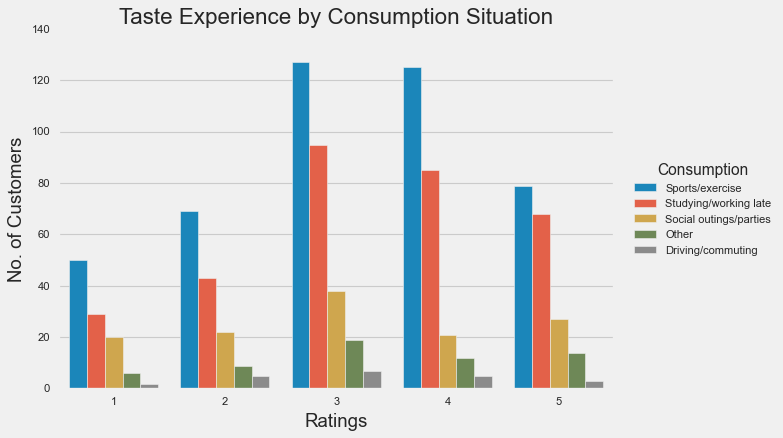

In [429]:
#average rating
avg_rating = np.array(brand_visibility['taste_experience']).mean()
avg_rating = np.round(avg_rating, 2)
print('Average Ratings of CodeX is : ', avg_rating)

# making multiple figure 
fig1, ax1 = plt.subplots() 
fig2, ax2 = plt.subplots() 
fig3, ax3 = plt.subplots()

# plotting the charts
ax1 = sns.countplot(data=brand_visibility, x='taste_experience', hue='age', ax=ax1) 
ax2 = sns.countplot(data=brand_visibility, x='taste_experience', hue='gender', ax=ax2) 
ax3 = sns.countplot(data=brand_visibility, x='taste_experience', hue='typical_consumption_situations', ax=ax3) 

# formatting the plots
plt.tight_layout()
ax1.set(title='Taste Experience by Age Group', xlabel='Ratings', ylabel='No. of Customers')
ax2.set(title='Taste Experience by Gender', xlabel='Ratings', ylabel='No. of Customers')
ax3.set(title='Taste Experience by Consumption Situation', xlabel='Ratings', ylabel='No. of Customers')
ax1.legend(title='Age Groups', loc='center right', bbox_to_anchor=(1.2, 0.5))
ax2.legend(title='Gender', loc='center right', bbox_to_anchor=(1.2, 0.5))
ax3.legend(title='Consumption', loc='center right', bbox_to_anchor=(1.3, 0.5))
# ax1.legend(labels=[avg_rating], loc='upper right')
plt.show()

__Which cities do we need to focus more on?__
> we need to focus on following cities
>    * Pune Ahemdabad Kolkata (Tier 2)
>    * Delhi Chennai Mumbai (Tier 1)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


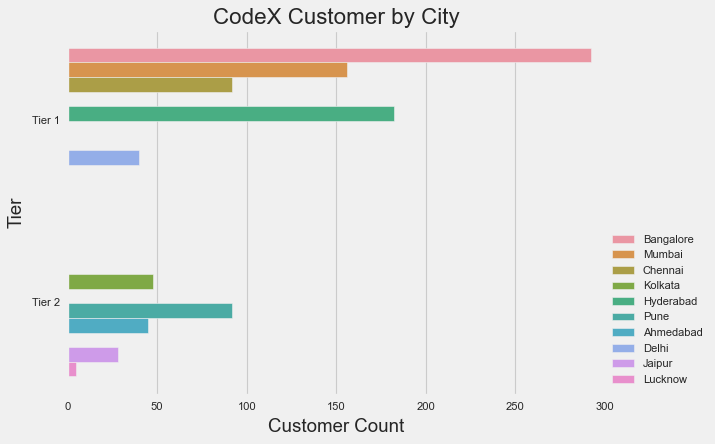

In [423]:
# merge data 
merged_cities_responses = pd.merge(df_cities, merged_respondent_responses, on='city_id')
merged_cities_responses.sort_values('respondent_id', inplace=True)
merged_cities_responses.head()

# filtering the required fields
filter_codeX = merged_cities_responses['current_brands'] == 'CodeX'
response_by_cities = merged_cities_responses.loc[filter_codeX, ['respondent_id', 'city', 'tier', 'current_brands']]
response_by_cities.head()

# bar plot with conditional formatting
ax = sns.countplot(response_by_cities, y='tier', hue='city')

# formatting plot
plt.tight_layout()
ax.set(title='CodeX Customer by City', xlabel='Customer Count', ylabel='Tier')
plt.legend(loc='lower right', bbox_to_anchor=((1.2, 0)))
plt.show()

---
## Purchase Behavior
- Where do respondents prefer to purchase energy drinks?
- What are the typical consumption situations for energy drinks among respondents?
- What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

In [438]:
# filtering the data
df_purchase_behavior = merged_respondent_responses[['respondent_id', 'gender', 'purchase_location', 'price_range',
                                                    'consume_frequency', 'consume_time', 'consume_reason', 'typical_consumption_situations',
                                                    'packaging_preference', 'limited_edition_packaging']]

df_purchase_behavior.head()

,respondent_id,gender,purchase_location,price_range,consume_frequency,consume_time,consume_reason,typical_consumption_situations,packaging_preference,limited_edition_packaging
0,120031,Female,Supermarkets,50-99,2-3 times a week,To stay awake during work/study,Increased energy and focus,Studying/working late,Compact and portable cans,Yes
1,120032,Male,Supermarkets,50-99,2-3 times a month,Throughout the day,To boost performance,Sports/exercise,Compact and portable cans,No
2,120033,Male,Supermarkets,100-150,Rarely,Before exercise,Increased energy and focus,Studying/working late,Innovative bottle design,Not Sure
3,120034,Female,Supermarkets,Above 150,2-3 times a week,To stay awake during work/study,To boost performance,Sports/exercise,Compact and portable cans,No
4,120035,Female,Online retailers,100-150,Daily,To stay awake during work/study,Increased energy and focus,Studying/working late,Compact and portable cans,Yes


__Where do respondents prefer to purchase energy drinks?__
> Respondents mostly prefer to purchase drinks from Supermarkets and Online Retailers

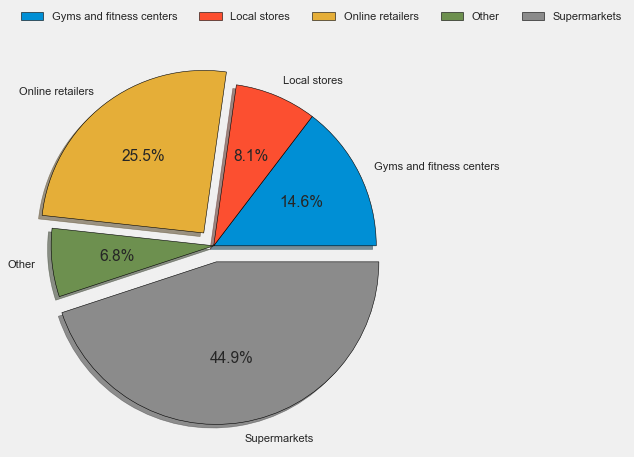

In [465]:
# pie chart for composition analysis
pie_data = df_purchase_behavior.groupby(by=['purchase_location'])['respondent_id'].count().sort_index()
pie_data = np.array(pie_data).reshape(-1)
pie_label = np.array(df_purchase_behavior['purchase_location'].sort_values().unique())
total = df_purchase_behavior['respondent_id'].count()

# data explode function
pie_explode = []
for x in range(len(pie_label)):
    if (pie_data[x]/total) > 0.2:
        pie_explode.append(0.1)
    else:
        pie_explode.append(0.0)

# plotting pie chart
ax = plt.pie(pie_data, labels=pie_label, autopct="%1.1f%%", shadow=True, wedgeprops={'edgecolor' : 'black'}, explode=pie_explode)

# formatting the plot
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=((0, 1.1)), ncols=len(pie_label))
plt.show()

__What are the typical consumption situations for energy drinks among respondents?__
> Respondents likes to consume energy drinks 2-3 times a week, once a week or 2-3 times a month

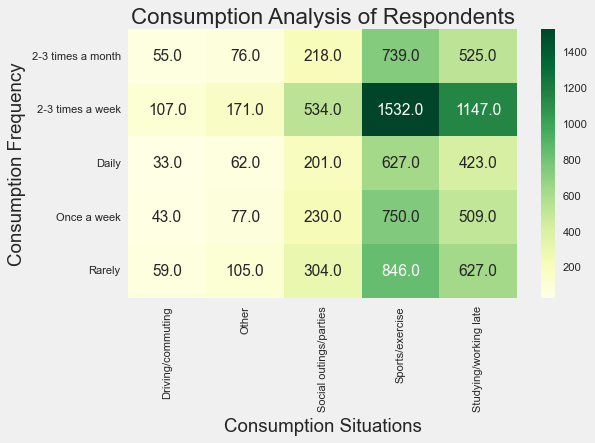

In [480]:
# making pivot table
df_respondent_consumption = df_purchase_behavior.pivot_table(index='consume_frequency', 
                                                             columns='typical_consumption_situations', 
                                                             values='respondent_id', 
                                                             aggfunc=pd.Series.nunique)

# making heat map
# suing fmt parameter to convert from scientific to float with 1 decimal place
ax = sns.heatmap(df_respondent_consumption, cmap='YlGn', annot=True, fmt='.1f')

# formatting plot
plt.tight_layout()
ax.set(title='Consumption Analysis of Respondents', xlabel='Consumption Situations', ylabel='Consumption Frequency')
plt.show()

__What factors influence respondents' purchase decisions, such as price range and limited edition packaging?__
> Most of the respondents are willing to pay 50-99 or 100-150 for energy drink while limitedd edition packaging have almost no influence on purchase decisions

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


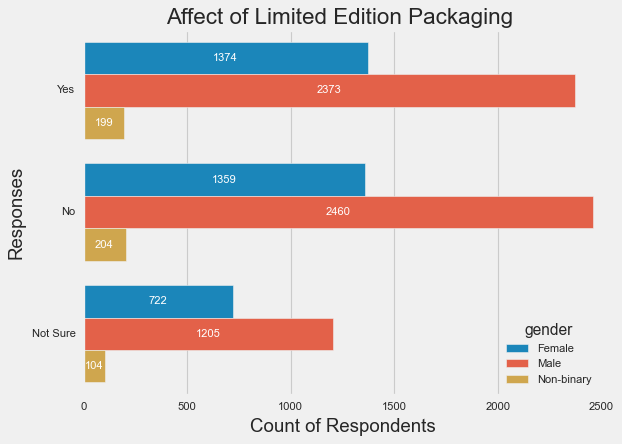

In [525]:
# making the plot
plt2 = sns.countplot(data=df_purchase_behavior, y='limited_edition_packaging', hue='gender', width=0.8)

# adding data labels
for j in range(len(df_purchase_behavior['limited_edition_packaging'].unique())):
    plt.bar_label(plt2.containers[j-1], label_type='center', fontsize=10, color='white')

# formatting
plt.tight_layout()
plt2.set(title='Affect of Limited Edition Packaging ', 
         xlabel='Count of Respondents',
         ylabel='Responses')
plt.show()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


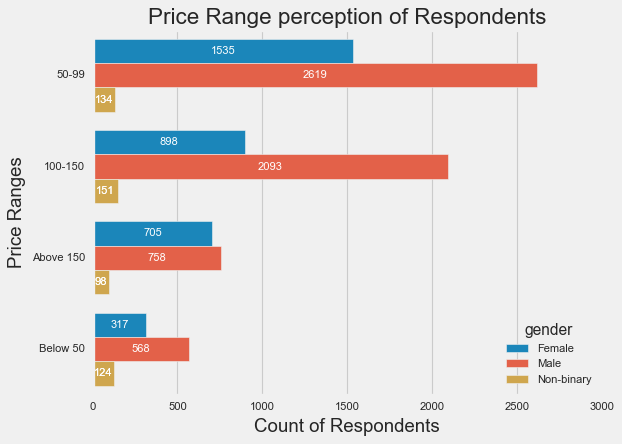

In [523]:
# making the plot 
plt1 = sns.countplot(data=df_purchase_behavior, y='price_range', hue='gender', width=0.8)

# data lebels
for i in range(len(df_purchase_behavior['price_range'].unique())):
    plt.bar_label(plt1.containers[i-1], label_type='center', fontsize=10, color='white')

# formatting
plt.tight_layout()
plt1.set(title='Price Range perception of Respondents', 
         xlabel='Count of Respondents',
         ylabel='Price Ranges')
plt.show()

---
# Give 5 recommendations for CodeX (below are some samples)

__1. What immediate improvements can we bring to the product?__
> - Increasing the use of Guarana. Guarana is a plant used medicinally by Amazonian tribes for centuries. It’s found in many energy and soft drinks and may have benefits such as helping reduce fatigue, boost brain health, and protect the heart. According to analyses most of the respondent are unaware with use of Guarana and this will give us an competitive edge against our competiton
> - Developing and R&D reserach team to explore and develop product for females and adults in 30-45 years segment
> - Making improvement in products to attract adults who have regular consumption and either prefer it during sports activities, study and late working sprints. Finally we can develop an exclusive product to attract adults consuming it while driving purpose.

__2. What should be the ideal price of our product?__
> - We can launch our product in two price segment. Firstly for individuals having regular consumption with a price range of 50-99. Second we can release a premium product in price segment of 100-150 that will give high performance output to consumers.

3. What kind of marketing campaigns, offers, and discounts we can run?
> - We can run marketing campaings through Online Ads and TV Commercials to target customer who are into sports, working professionals, college students and people performing regular driving tasks
> - We can target customers in following cities
>    * Pune Ahemdabad Kolkata (Tier 2)
>    * Delhi Chennai Mumbai (Tier 1)
> - We can provide special discounts to bulk orders for parties to attract consumers who like to party, we can approach gyms and sports centers to provide their best performing or Top 10% atheletes special dicounts and merchandise of company
  

4. Who can be a brand ambassador, and why?
> Our brand ambassadors can be people who are known atheletes, top-class professionals or renowned racers and driving professionals to target cusomers in our domain. Since most of our target audience like to consume energy drink for sports and perform better in professional life. We can also target people into logistics and road transport insdustry though onboarding renowned racers and driving professionals

5. Who should be our target audience, and why?
> Following are our target customer segments
> - Segment 1 : Sports person / high performance professionals males and females 
> - Segment 2 : People who like to party on weekends or clubs or party places or college fest for youngsters  